In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as snb
import numpy as np

main_path = os.path.abspath(os.path.join(os.path.dirname("./test_text_generation.ipynb"), '..'))

True


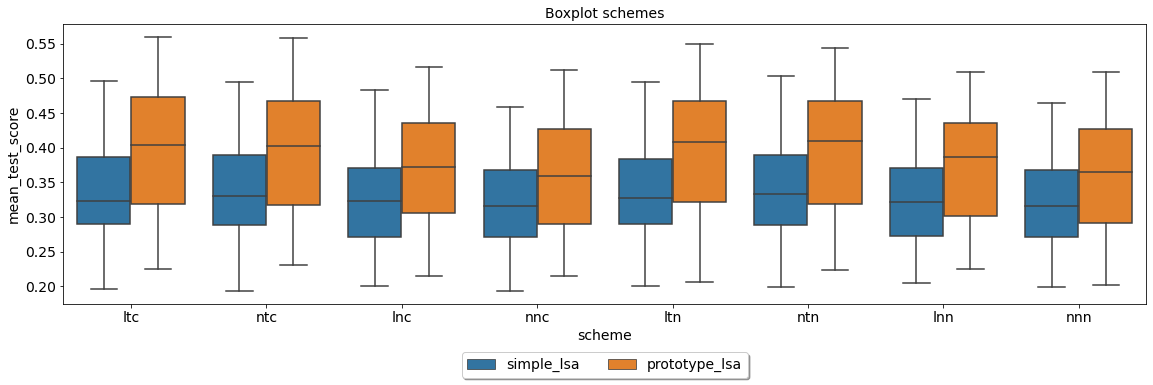

In [15]:
key = "A"
file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s.csv" % key)
df0 = pd.read_csv(file, index_col=0)
df0 = df0[df0["reducer_type"] == "lsa"]
print(np.isnan(df0["class_feature"][0]))
df0 = df0[df0["class_feature"] != "type-1"]
names = {"type-1": "class-based", "type-2": "prototype"}
df0["class_feature"] = [names[x] if x in ["type-1", "type-2"] else "simple" for x in df0["class_feature"].to_numpy()]
df0["scheme"] = [x[:3] for x in df0["scheme"].to_numpy()]

df0["hue1"] = [x + "_" + y for x, y in zip(df0["class_feature"].to_numpy(), df0["reducer_type"].to_numpy())]
plt.figure(figsize=(16, 5))
b = snb.boxplot(x="scheme", y="mean_test_score", hue="hue1", data=df0)
b.tick_params(labelsize=14)
b.xaxis.label.set_size(14)
b.yaxis.label.set_size(14)
b.set_title("Boxplot schemes", fontsize=14)
box = b.get_position()
b.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
b.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=6, fontsize=14)
plt.tight_layout()

# plt.figure()
# b = snb.boxplot(x="class_feature", y="mean_test_score", data=df0)
# b.tick_params(labelsize=13)
# b.set_xlabel("train set vectors type", fontsize=14)
# # b.xaxis.label.set_size(14)
# b.yaxis.label.set_size(14)
# b.set_title("Boxplot train set vectors type", fontsize=14)
# plt.figure()
# b = snb.boxplot(x="reducer_type", y="mean_test_score", data=df0)
# b.tick_params(labelsize=13)
# b.xaxis.label.set_size(14)
# b.yaxis.label.set_size(14)
# b.set_title("Boxplot reducer types", fontsize=14)
# df0.sort_values(["mean_test_score"], ascending=False)

Text(0.5, 1.0, 'Boxplot strategies')

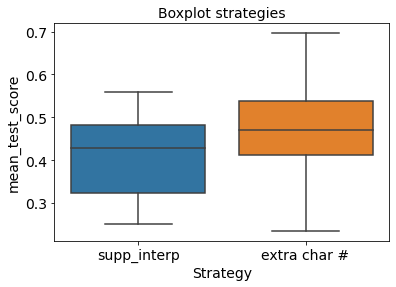

In [74]:
key = "A"
file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s.csv" % key)
df = pd.read_csv(file, index_col=0)
df["irr_handler"] = ["supp_interp"] * len(df)
general_df = df.sort_values("mean_test_score", ascending=False)
general_df = general_df[general_df["class_feature"] == "type-2"]
general_df = general_df[general_df["scheme"] == "ltc.ltc"]
general_df = general_df[general_df["reducer_type"] == "lsa"]
general_df = general_df.drop(["param_red__sc", "param_ext__idx"], axis=1)
general_df = general_df.drop_duplicates(subset=["window", "word_length"])
general_df

key = "B"
file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s.csv" % key)
df = pd.read_csv(file, index_col=0)
df["irr_handler"] = ["extra char #"]* len(df)
df = df.sort_values("mean_test_score", ascending=False)
df = df.drop(["param_ext__idx"], axis=1)
general_df = general_df.append(df)
b = snb.boxplot(x="irr_handler", y="mean_test_score", data=general_df)
b.tick_params(labelsize=14)
b.set_xlabel("Strategy", fontsize=14)
b.yaxis.label.set_size(14)
b.set_title("Boxplot strategies", fontsize=14)

Text(0.5, 1.0, 'Boxplot configurations')

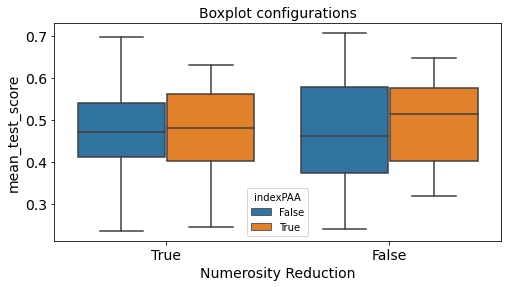

In [78]:
key = "B"
file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s.csv" % key)
df = pd.read_csv(file, index_col=0)
df["numerosity_reduction"] = ["True"]* len(df)
df["indexPAA"] = ["False"] * len(df)
df = df.sort_values("mean_test_score", ascending=False)
df = df.drop(["param_ext__idx"], axis=1)
general_df = df

key = "D"
file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s.csv" % key)
df = pd.read_csv(file, index_col=0)
df["numerosity_reduction"] = ["True"]* len(df)
df["indexPAA"] = ["True"] * len(df)
df = df.sort_values("mean_test_score", ascending=False)
df = df.drop(["param_ext__idx"], axis=1)
general_df = general_df.append(df)



key = "E"
df = None
for i in [2, 3]:
    file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s_p%d.csv" % (key, i))
    df_i = pd.read_csv(file, index_col=0)
    if df is None:
        df = df_i
    else:
        df = df.append(df_i, ignore_index=True)
# df["config"] = ["no-NR, no-indexPAA"]* len(df)
df["numerosity_reduction"] = ["False"] * len(df)
df["indexPAA"] = ["False"] * len(df)
df = df.sort_values("mean_test_score", ascending=False)
df = df.drop(["param_ext__idx"], axis=1)
general_df = general_df.append(df)



key = "H"
df = None
for i in [0]:
    file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s_p%d.csv" % (key, i))
    df_i = pd.read_csv(file, index_col=0)
    if df is None:
        df = df_i
    else:
        df = df.append(df_i, ignore_index=True)
# df["config"] = ["no-NR, indexPAA"]* len(df)
df["numerosity_reduction"] = ["False"] * len(df)
df["indexPAA"] = ["True"] * len(df)
df = df.sort_values("mean_test_score", ascending=False)
df = df.drop(["param_idx", "max_test_score"], axis=1)
general_df = general_df.append(df)

plt.figure(figsize=(8, 4))
b = snb.boxplot(x="numerosity_reduction", y="mean_test_score", hue="indexPAA", data=general_df)
b.tick_params(labelsize=14)
b.set_xlabel("Numerosity Reduction", fontsize=14)
b.yaxis.label.set_size(14)
b.set_title("Boxplot configurations", fontsize=14)

In [20]:
key = "B"
file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s.csv" % key)
df = pd.read_csv(file, index_col=0)
df["config"] = ["B"] * len(df)
df = df.sort_values("mean_test_score", ascending=False)
df = df.drop(["param_ext__idx"], axis=1)
general_df = general_df.append(df)
df

,class_feature,scheme,reducer_type,window,word_length,mean_test_score,std_test_score,rank_test_score,config
93,type-2,ltc.ltc,lsa,63.785830,4,0.696667,0.026667,1,B
125,type-2,ltc.ltc,lsa,80.301602,5,0.683333,0.065405,2,B
123,type-2,ltc.ltc,lsa,63.785830,5,0.676667,0.058784,3,B
154,type-2,ltc.ltc,lsa,71.568878,6,0.675000,0.055403,4,B
121,type-2,ltc.ltc,lsa,50.666886,5,0.671667,0.045977,5,B
...,...,...,...,...,...,...,...,...,...
24,type-2,ltc.ltc,lsa,160.222761,2,0.271667,0.069940,167,B
37,type-2,ltc.ltc,lsa,715.688783,2,0.260000,0.073862,168,B
36,type-2,ltc.ltc,lsa,637.858299,2,0.253333,0.040689,169,B
28,type-2,ltc.ltc,lsa,253.935963,2,0.245000,0.058238,170,B


In [13]:
key = "C"
file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s.csv" % key)
df = pd.read_csv(file, index_col=0)
df = df.sort_values("mean_test_score", ascending=False)
df

,class_feature,scheme,reducer_type,param_ext__idx,window,word_length,mean_test_score,std_test_score,rank_test_score
159,type-2,ltc.ltc,lsa,159,80.301602,6,0.630000,0.058595,1
128,type-2,ltc.ltc,lsa,128,71.568878,5,0.628333,0.079948,2
172,type-2,ltc.ltc,lsa,172,358.694081,6,0.626667,0.113578,3
171,type-2,ltc.ltc,lsa,171,319.686436,6,0.625000,0.094942,4
173,type-2,ltc.ltc,lsa,173,402.461379,6,0.625000,0.106523,5
...,...,...,...,...,...,...,...,...,...
37,type-2,ltc.ltc,lsa,37,715.688783,2,0.290000,0.052810,177
35,type-2,ltc.ltc,lsa,35,568.491807,2,0.283333,0.047140,178
32,type-2,ltc.ltc,lsa,32,402.461379,2,0.263333,0.047022,179
38,type-2,ltc.ltc,lsa,38,803.016022,2,0.261667,0.052202,180


In [14]:
key = "D"
file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s.csv" % key)
df = pd.read_csv(file, index_col=0)
df.sort_values("mean_test_score", ascending=False)

,class_feature,scheme,reducer_type,param_ext__idx,window,word_length,mean_test_score,std_test_score,rank_test_score
159,type-2,ltc.ltc,lsa,159,80.301602,6,0.630000,0.058595,1
172,type-2,ltc.ltc,lsa,172,358.694081,6,0.626667,0.113578,2
128,type-2,ltc.ltc,lsa,128,71.568878,5,0.626667,0.078599,2
171,type-2,ltc.ltc,lsa,171,319.686436,6,0.625000,0.094942,4
173,type-2,ltc.ltc,lsa,173,402.461379,6,0.625000,0.106523,5
...,...,...,...,...,...,...,...,...,...
37,type-2,ltc.ltc,lsa,37,715.688783,2,0.290000,0.052810,177
35,type-2,ltc.ltc,lsa,35,568.491807,2,0.283333,0.047140,178
32,type-2,ltc.ltc,lsa,32,402.461379,2,0.263333,0.047022,179
38,type-2,ltc.ltc,lsa,38,803.016022,2,0.261667,0.052202,180


In [20]:
key = "E"
main_df = None
for i in [1, 2, 3]:
    file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s_p%d.csv" % (key, i))
    df = pd.read_csv(file, index_col=0)
    if main_df is None:
        main_df = df
    else:
        main_df = main_df.append(df, ignore_index=True)

main_df.sort_values("mean_test_score", ascending=False)

,class_feature,scheme,reducer_type,param_ext__idx,window,word_length,mean_test_score,std_test_score,rank_test_score
104,type-2,ltc.ltc,lsa,48,63.785830,4,0.706667,0.042295,1
130,type-2,ltc.ltc,lsa,74,80.301602,5,0.686667,0.072188,2
154,type-2,ltc.ltc,lsa,98,71.568878,6,0.683333,0.050000,3
50,type-2,ltc.ltc,lsa,19,50.666886,5,0.680000,0.050442,1
45,type-2,ltc.ltc,lsa,14,50.666886,4,0.668333,0.066854,2
...,...,...,...,...,...,...,...,...,...
75,type-2,ltc.ltc,lsa,19,506.668857,2,0.260000,0.051747,111
78,type-2,ltc.ltc,lsa,22,715.688783,2,0.250000,0.049441,112
69,type-2,ltc.ltc,lsa,13,253.935963,2,0.250000,0.047140,113
68,type-2,ltc.ltc,lsa,12,226.320665,2,0.245000,0.045977,114


In [21]:
key = "F"
main_df = None
for i in [0]:
    file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s_p%d.csv" % (key, i))
    df = pd.read_csv(file, index_col=0)
    if main_df is None:
        main_df = df
    else:
        main_df = main_df.append(df, ignore_index=True)

main_df.sort_values("mean_test_score", ascending=False)

,class_feature,scheme,reducer_type,window,word_length,mean_test_score,std_tet_score,max_test_score
1,type-2,ltc.ltc,lsa,11.342903,2,0.498333,0.043748,0.566667
0,type-2,ltc.ltc,lsa,10.109373,2,0.491667,0.047871,0.566667
3,type-2,ltc.ltc,lsa,14.279869,2,0.468333,0.053463,0.533333
4,type-2,ltc.ltc,lsa,16.022276,2,0.463333,0.036362,0.516667
9,type-2,ltc.ltc,lsa,16.022276,3,0.458333,0.066771,0.566667
2,type-2,ltc.ltc,lsa,12.726946,2,0.415000,0.055000,0.483333
8,type-2,ltc.ltc,lsa,14.279869,3,0.413333,0.058119,0.500000
5,type-2,ltc.ltc,lsa,10.109373,3,0.410000,0.044845,0.483333
6,type-2,ltc.ltc,lsa,11.342903,3,0.398333,0.063443,0.516667
7,type-2,ltc.ltc,lsa,12.726946,3,0.395000,0.078899,0.500000


In [22]:
key = "G"
main_df = None
for i in [1, 2, 3, 4]:
    file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s_p%d.csv" % (key, i))
    df = pd.read_csv(file, index_col=0)
    if main_df is None:
        main_df = df
    else:
        main_df = main_df.append(df, ignore_index=True)

main_df.sort_values("mean_test_score", ascending=False)

,class_feature,scheme,reducer_type,param_ext__idx,window,word_length,mean_test_score,std_test_score,rank_test_score,param_idx,max_test_score
6,type-2,ltc.ltc,lsa,6.0,20.170850,2,0.511667,0.078899,1.0,NaN,NaN
154,type-2,ltc.ltc,lsa,NaN,803.016022,4,0.506667,0.090738,NaN,24.0,0.633333
5,type-2,ltc.ltc,lsa,5.0,17.977289,2,0.505000,0.067515,2.0,NaN,NaN
1,type-2,ltc.ltc,lsa,1.0,11.342903,2,0.500000,0.058689,3.0,NaN,NaN
45,type-2,ltc.ltc,lsa,NaN,50.666886,3,0.500000,0.093393,NaN,14.0,0.716667
...,...,...,...,...,...,...,...,...,...,...,...
37,type-2,ltc.ltc,lsa,NaN,63.785830,2,0.348333,0.056984,NaN,6.0,0.466667
136,type-2,ltc.ltc,lsa,NaN,637.858299,2,0.346667,0.056667,NaN,6.0,0.450000
139,type-2,ltc.ltc,lsa,NaN,900.998796,2,0.331667,0.045613,NaN,9.0,0.416667
138,type-2,ltc.ltc,lsa,NaN,803.016022,2,0.325000,0.049582,NaN,8.0,0.400000


In [3]:
key = "H"
main_df = None
for i in [0]:
    file = os.path.join(main_path, "data", "results", "plasticc", "ibopf_config_%s_p%d.csv" % (key, i))
    df = pd.read_csv(file, index_col=0)
    if main_df is None:
        main_df = df
    else:
        main_df = main_df.append(df, ignore_index=True)

main_df.sort_values("mean_test_score", ascending=False)

,class_feature,scheme,reducer_type,param_idx,window,word_length,mean_test_score,std_test_score,max_test_score
127,type-2,ltc.ltc,lsa,127,63.785830,5,0.648333,0.058902,0.700000
172,type-2,ltc.ltc,lsa,172,358.694081,6,0.646667,0.116381,0.866667
171,type-2,ltc.ltc,lsa,171,319.686436,6,0.641667,0.096105,0.783333
173,type-2,ltc.ltc,lsa,173,402.461379,6,0.638333,0.113297,0.783333
128,type-2,ltc.ltc,lsa,128,71.568878,5,0.633333,0.078528,0.733333
...,...,...,...,...,...,...,...,...,...
38,type-2,ltc.ltc,lsa,38,803.016022,2,0.328333,0.072667,0.500000
23,type-2,ltc.ltc,lsa,23,142.798686,2,0.328333,0.071122,0.450000
80,type-2,ltc.ltc,lsa,80,10.109373,4,0.321667,0.064140,0.400000
39,type-2,ltc.ltc,lsa,39,900.998796,2,0.321667,0.076394,0.483333


<AxesSubplot:xlabel='mean_test_score'>

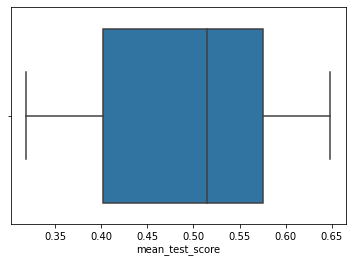